In [1]:
import pandas as pd

alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [2]:
print(f'Quantidade de linhas: {alucar.shape}')

Quantidade de linhas: (24, 2)


In [3]:
print(f'Quantidade de nulos: {alucar.isna().sum().sum()}')

Quantidade de nulos: 0


In [4]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [5]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.info() # ou dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [6]:
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot as plt
print(sns.__version__)

0.13.1


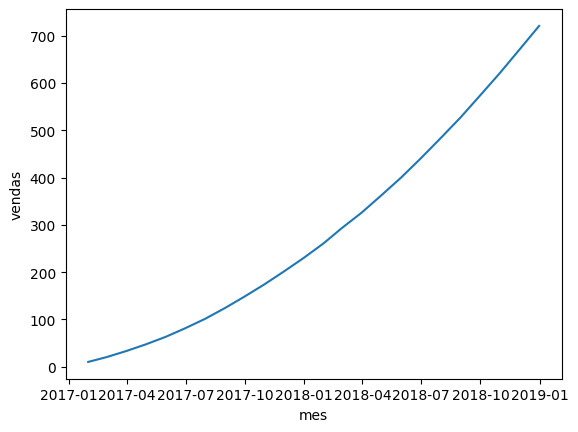

In [7]:
sns.lineplot(x='mes', y='vendas', data=alucar);

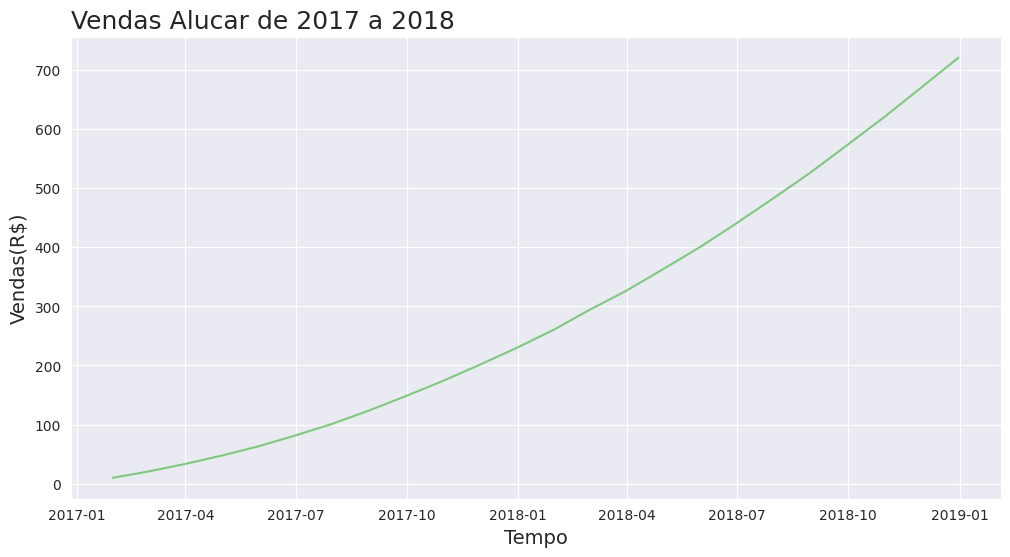

In [8]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas(R$)', fontsize=14)
ax = ax

In [9]:
alucar['aumento'] = alucar['vendas'].diff()
alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


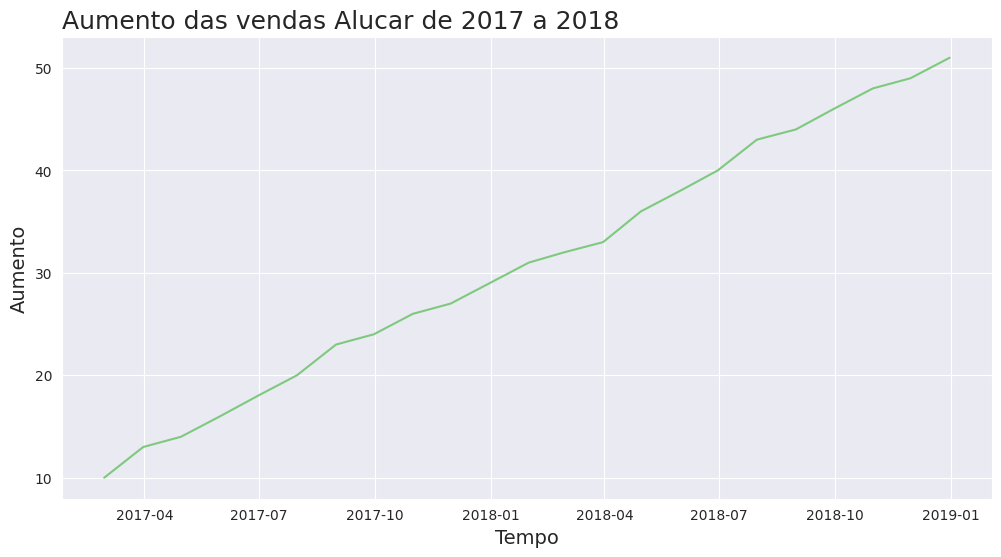

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [11]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

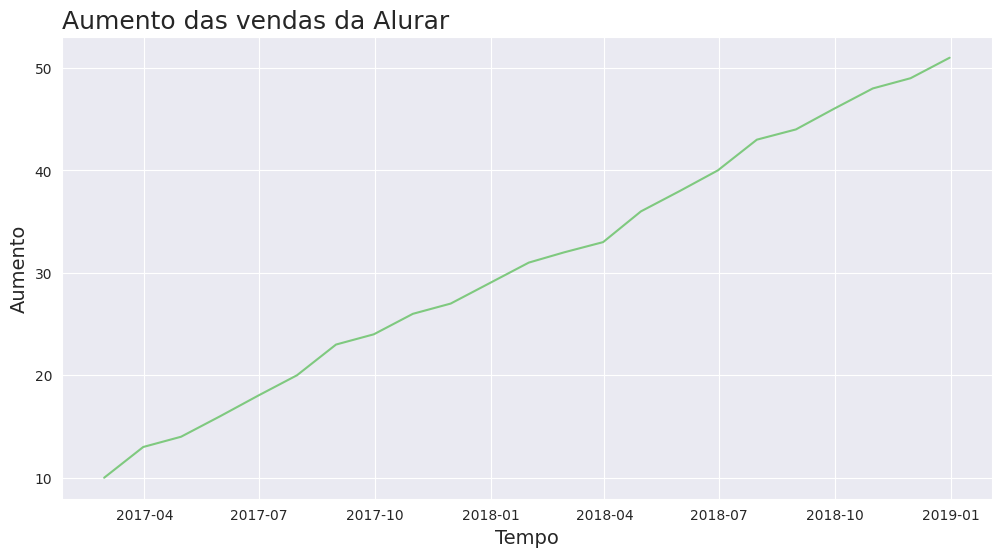

In [12]:
plotar('Aumento das vendas da Alurar', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [13]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


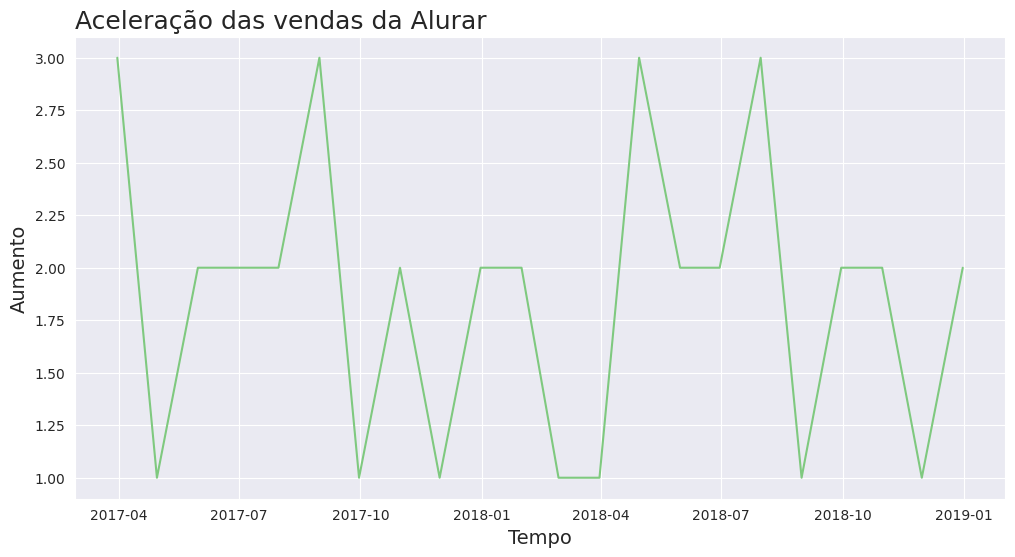

In [14]:
plotar('Aceleração das vendas da Alurar', 'Tempo', 'Aumento', 'mes', 'aceleracao', alucar)

<Axes: xlabel='mes', ylabel='aceleracao'>

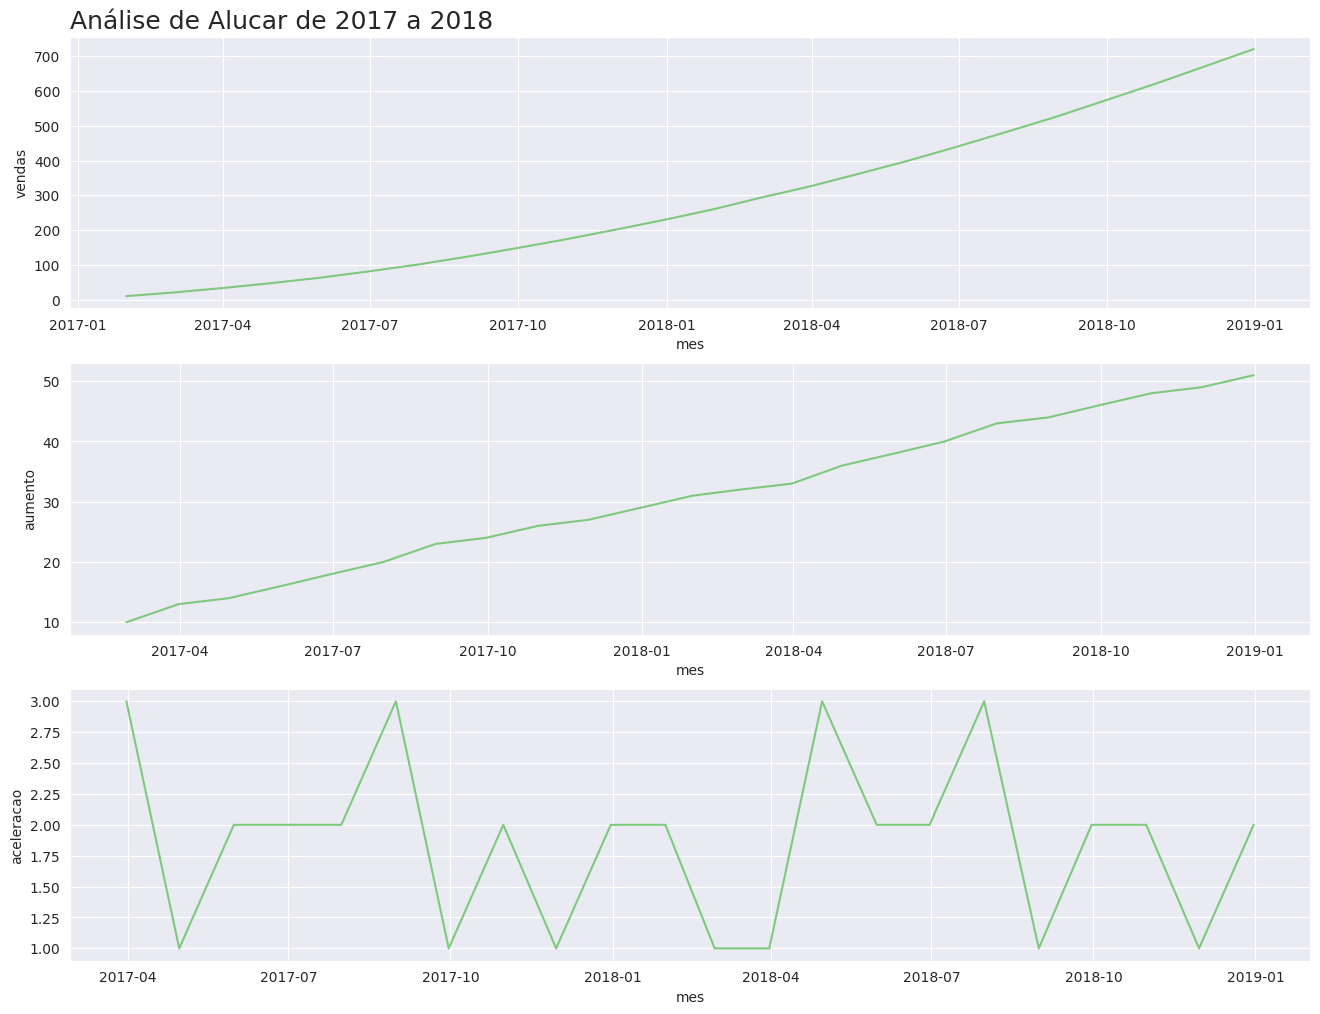

In [15]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)

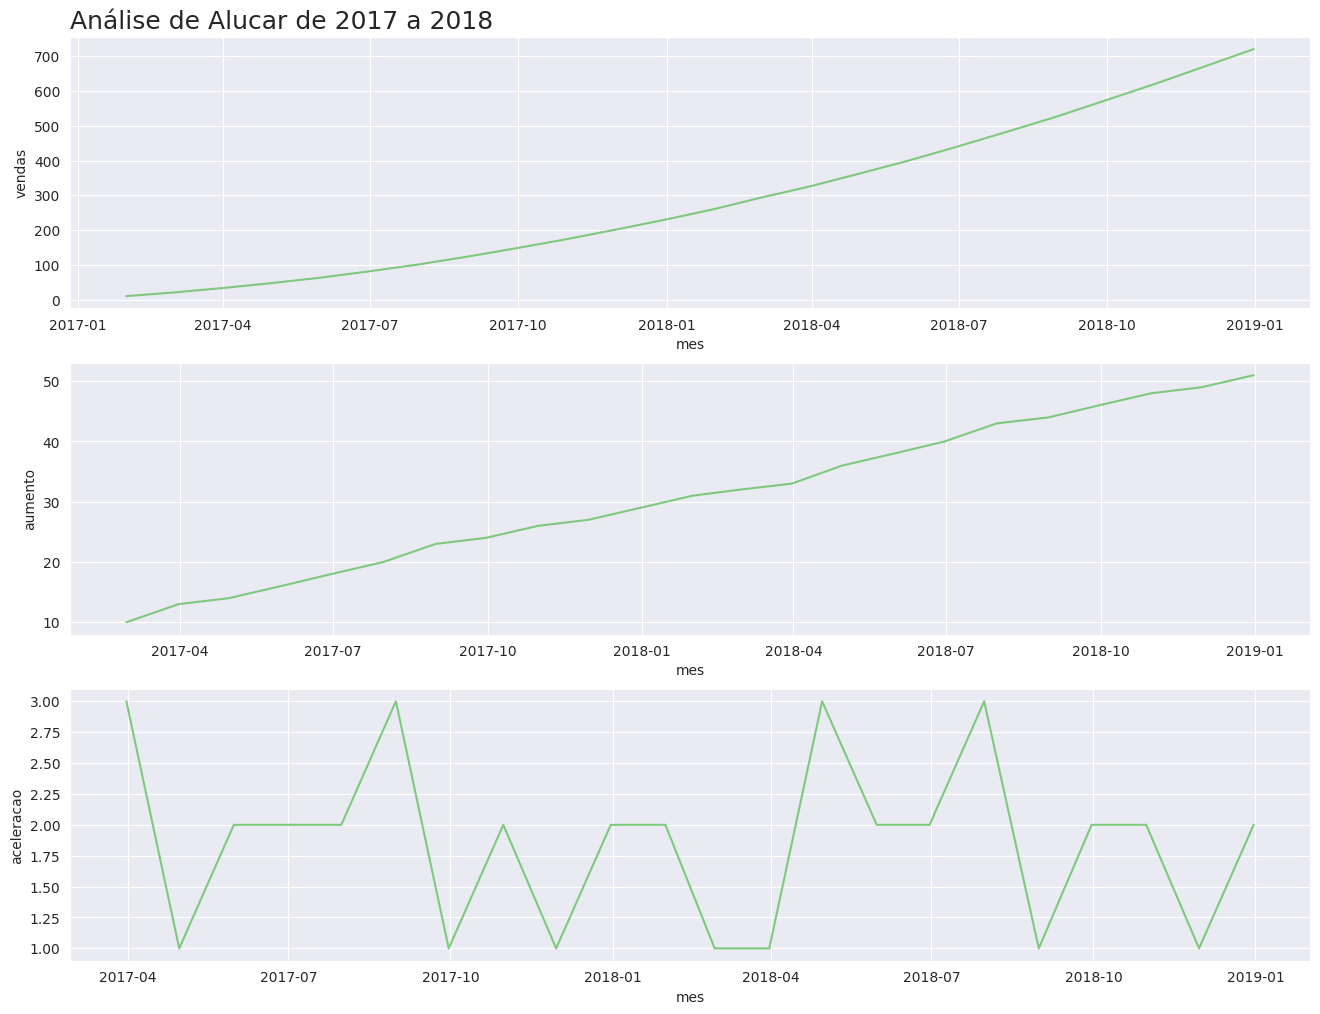

In [16]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Alucar de 2017 a 2018')

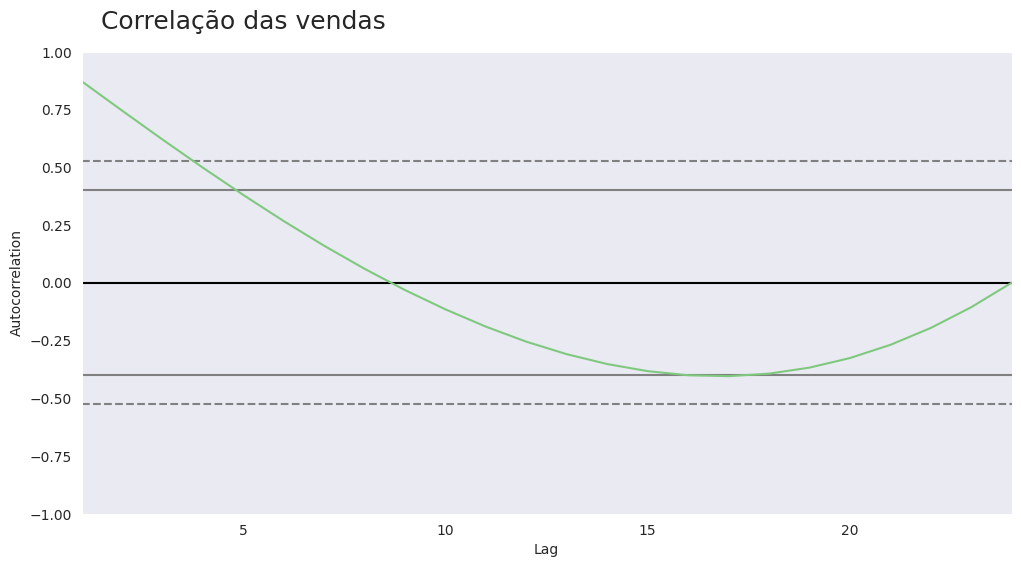

In [17]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

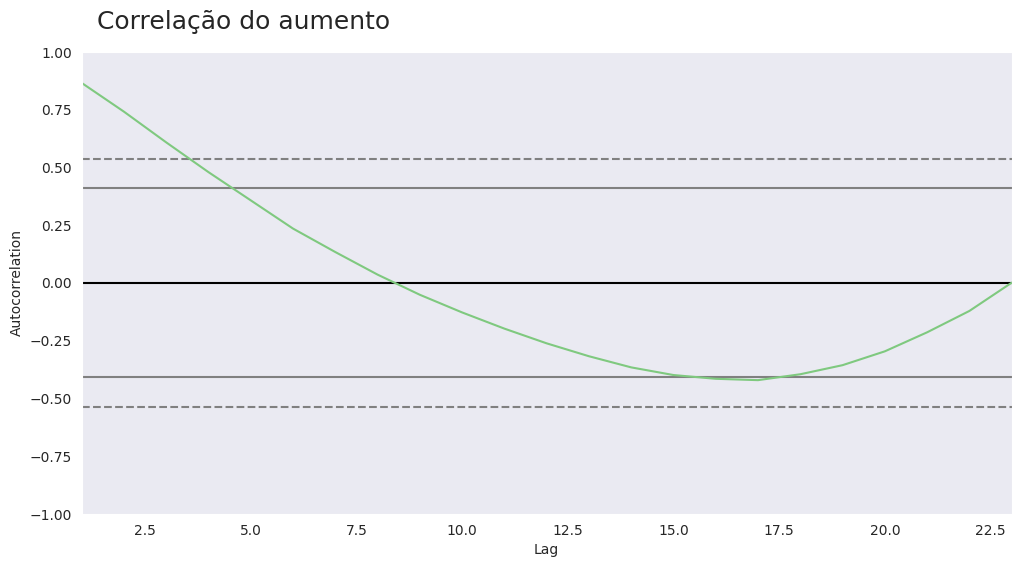

In [18]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

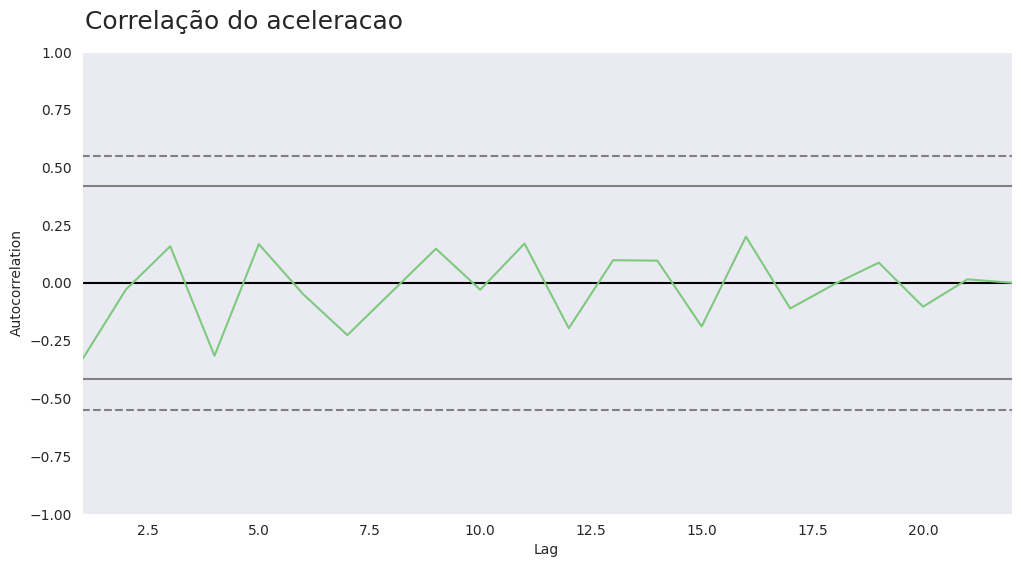

In [19]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [20]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [21]:
assinantes.shape

(24, 2)

In [22]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [23]:
assinantes.isna().sum().sum()

0

In [24]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [25]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [26]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


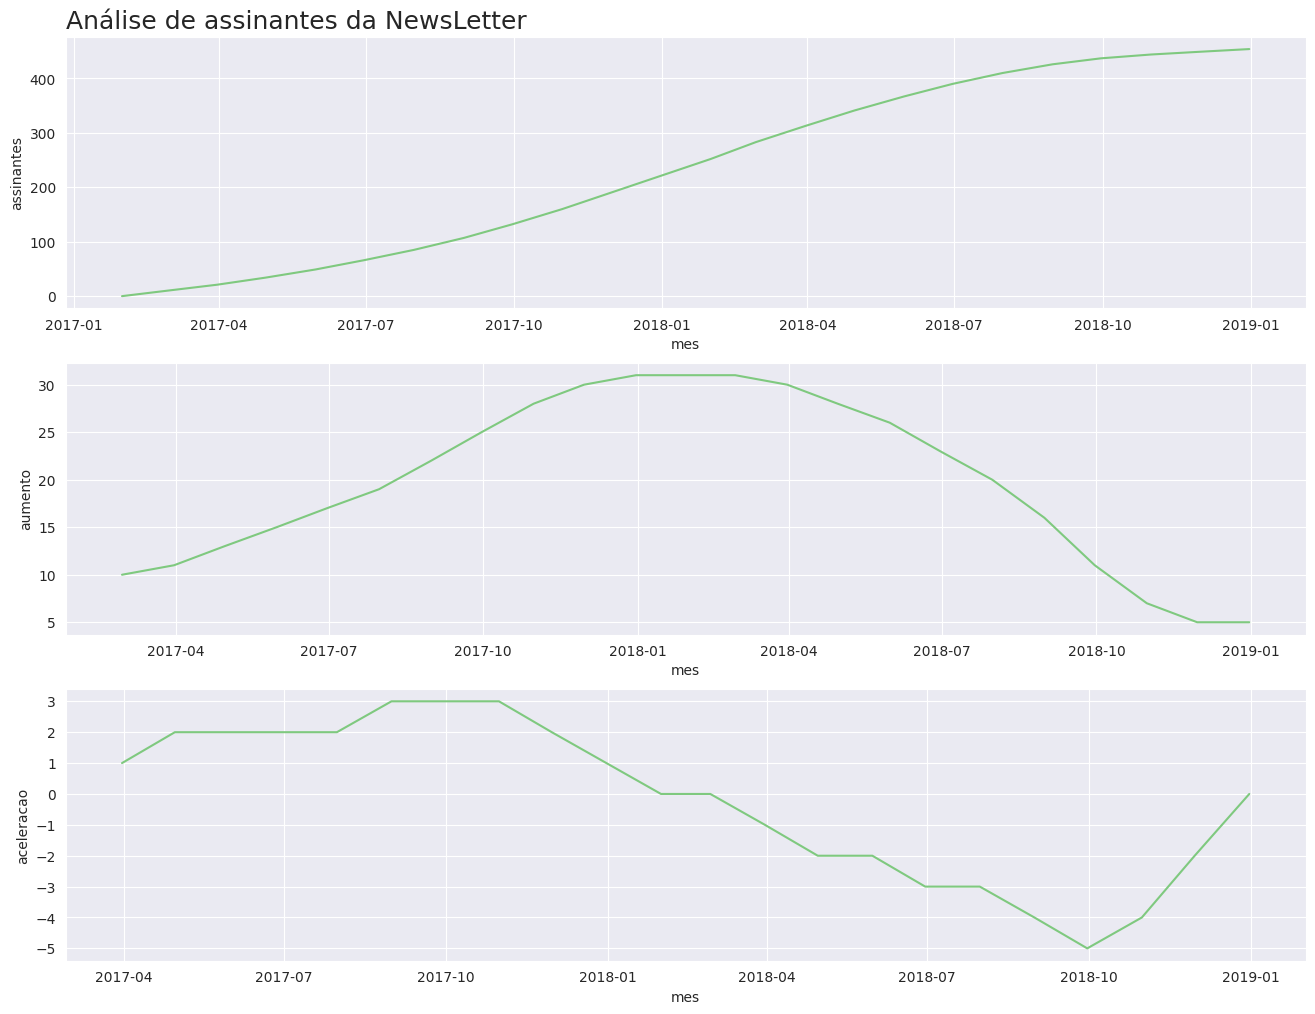

In [27]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da NewsLetter')

In [28]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.shape
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [29]:
chocolura

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211
5,2017-06-01,300
6,2017-07-01,210
7,2017-08-01,205
8,2017-09-01,208
9,2017-10-01,210


In [30]:
chocolura.isna().sum().sum()

0

In [31]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


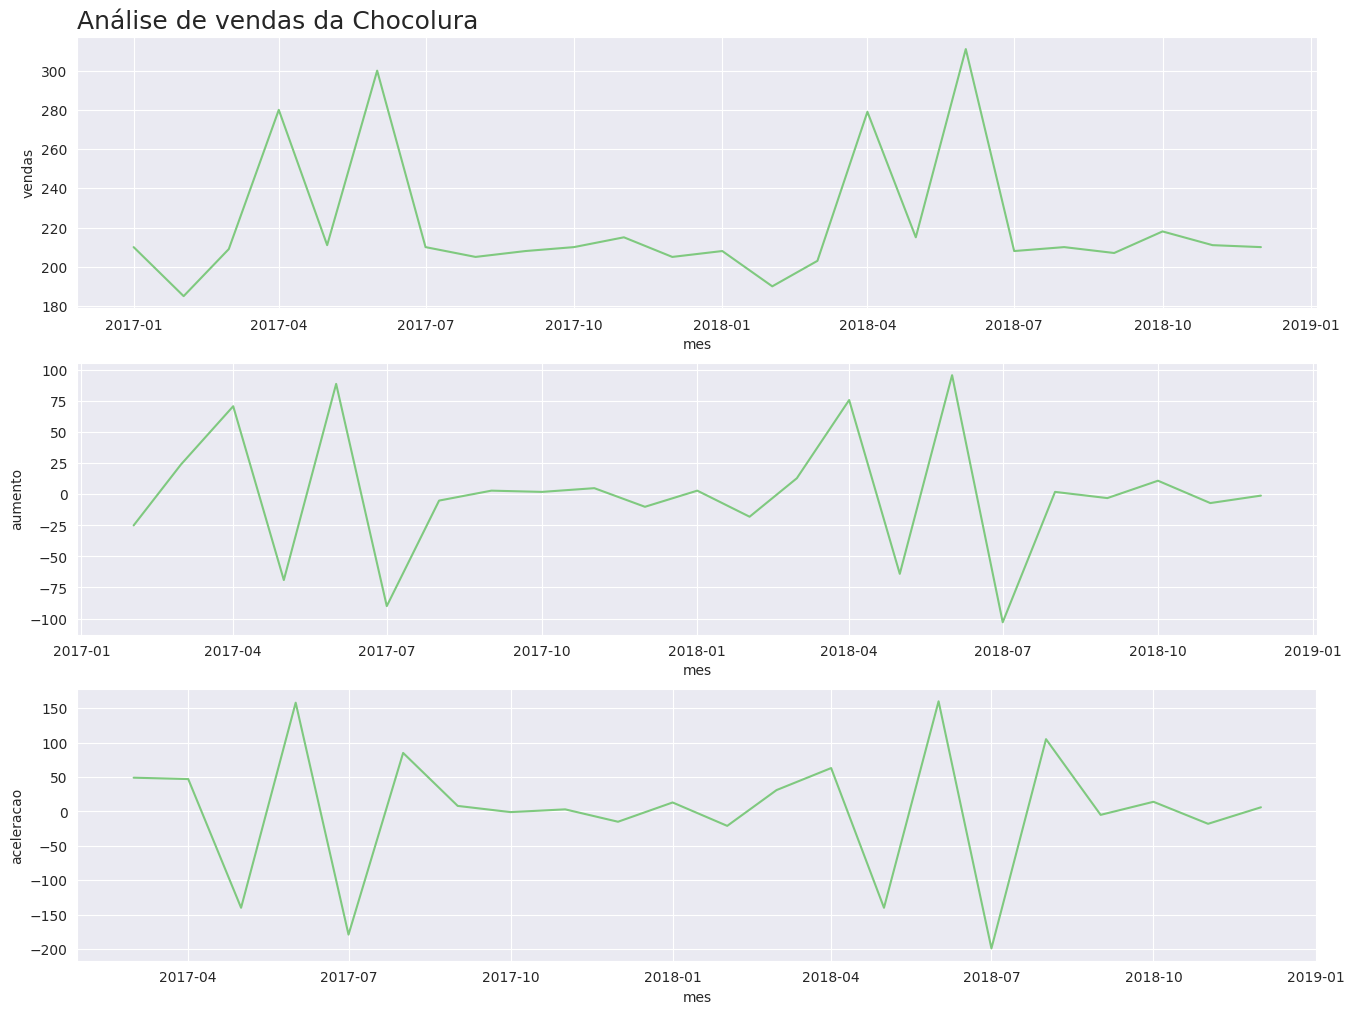

In [32]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura')

In [33]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.shape
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.isna().sum().sum()

0

In [34]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [35]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


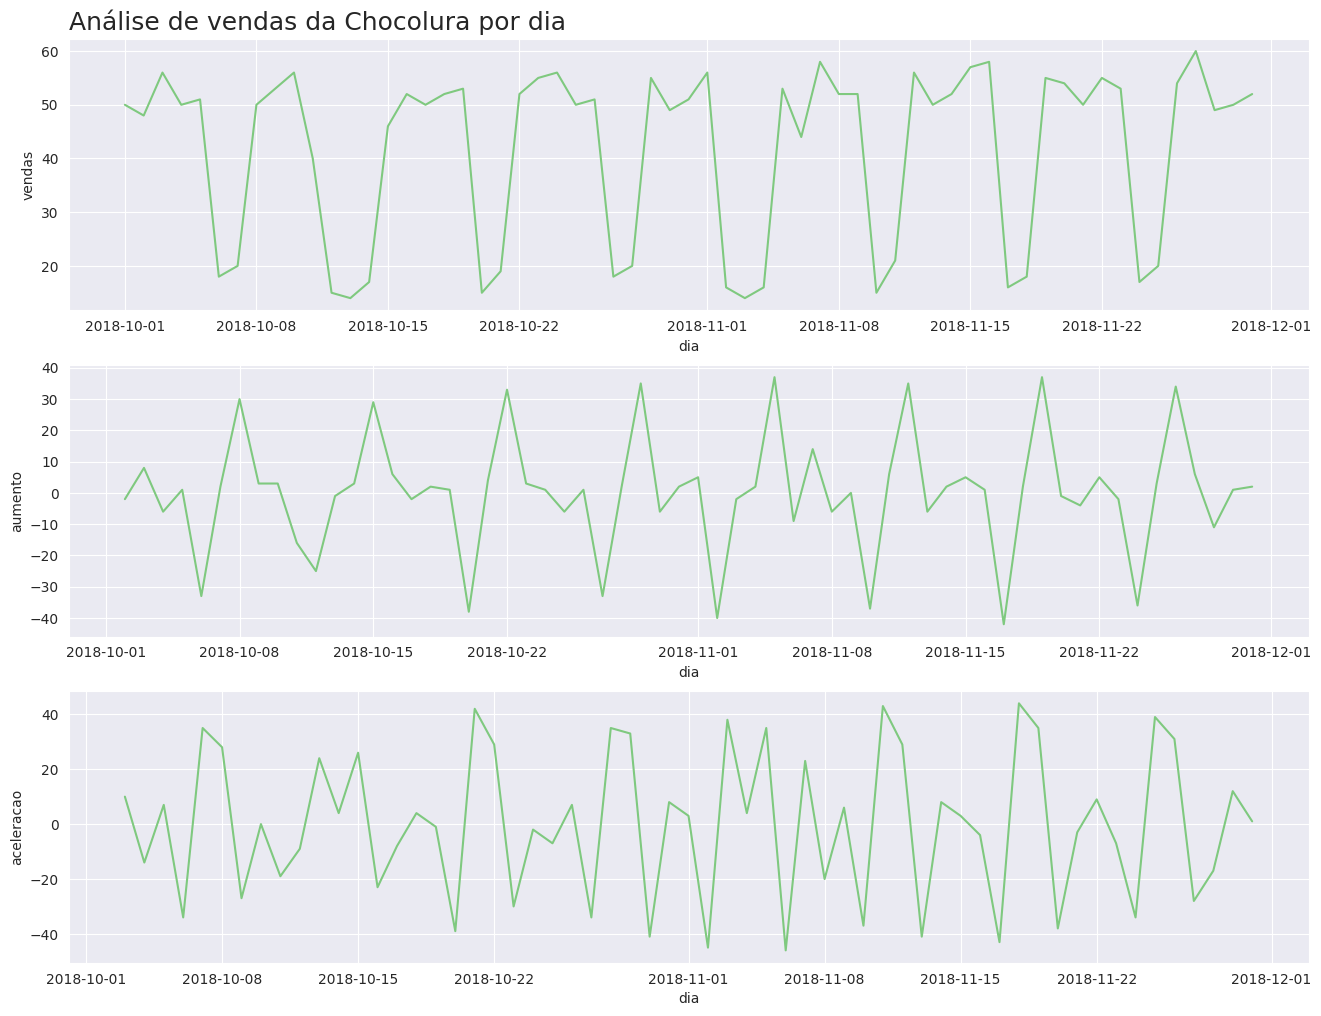

In [36]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas da Chocolura por dia')

In [47]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday

In [53]:
vendas_por_dia.head(7)
vendas_por_dia['dia_da_semana'].astype(str)
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dia            61 non-null     datetime64[ns]
 1   vendas         61 non-null     int64         
 2   aumento        60 non-null     float64       
 3   aceleracao     59 non-null     float64       
 4   dia_da_semana  61 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 2.3 KB


In [54]:
#vendas_por_dia['dia_da_semana'].astype(str)
#vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean()

0     0
1     1
2     2
3     3
4     4
     ..
56    0
57    1
58    2
59    3
60    4
Name: dia_da_semana, Length: 61, dtype: object

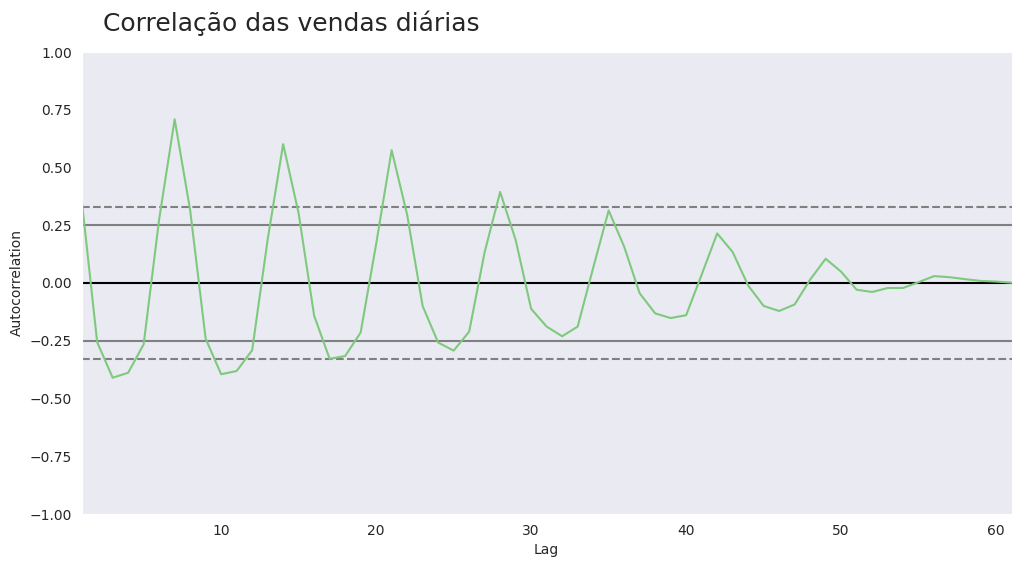

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

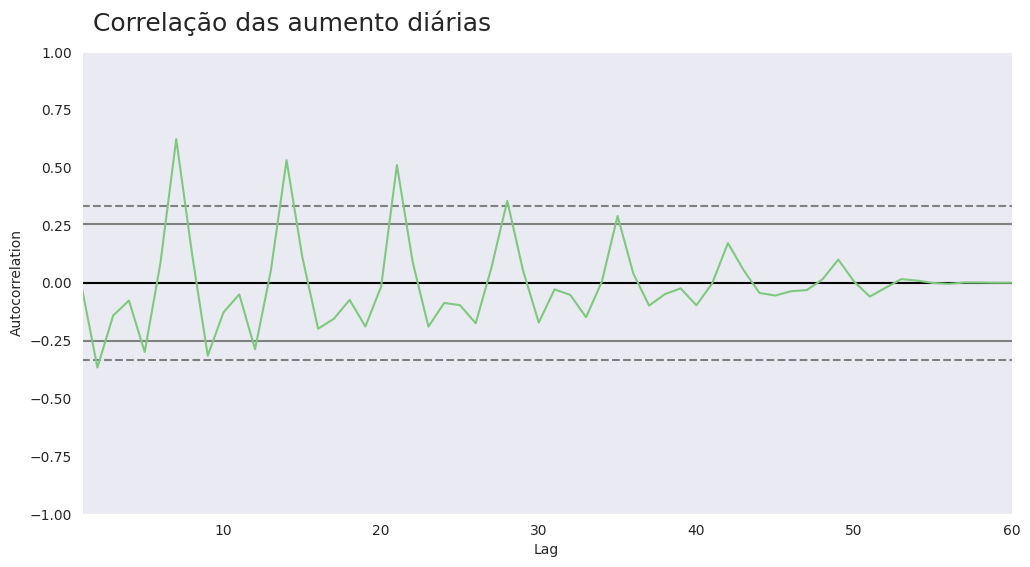

In [59]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

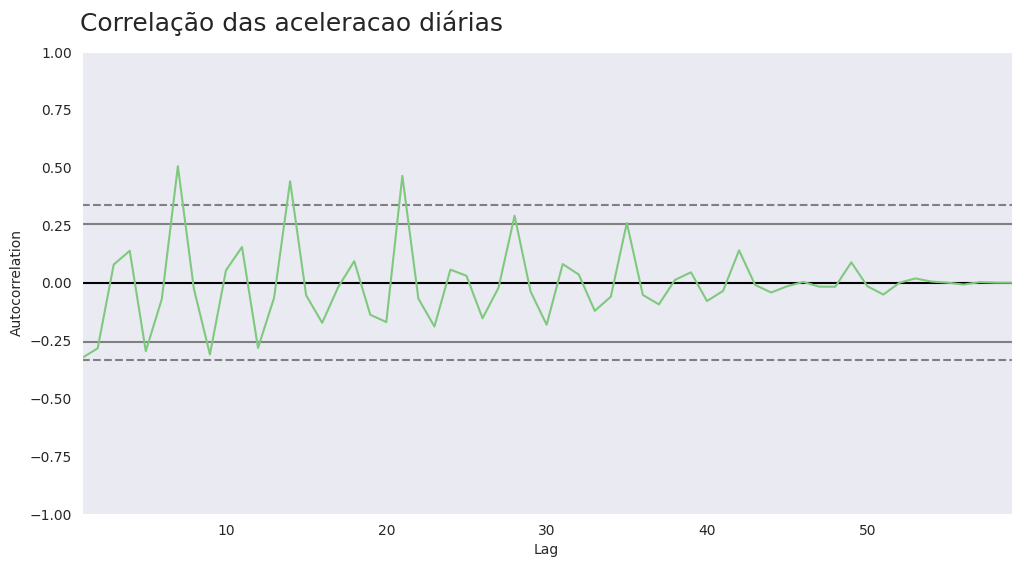

In [58]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleracao diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

In [60]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.shape
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [62]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


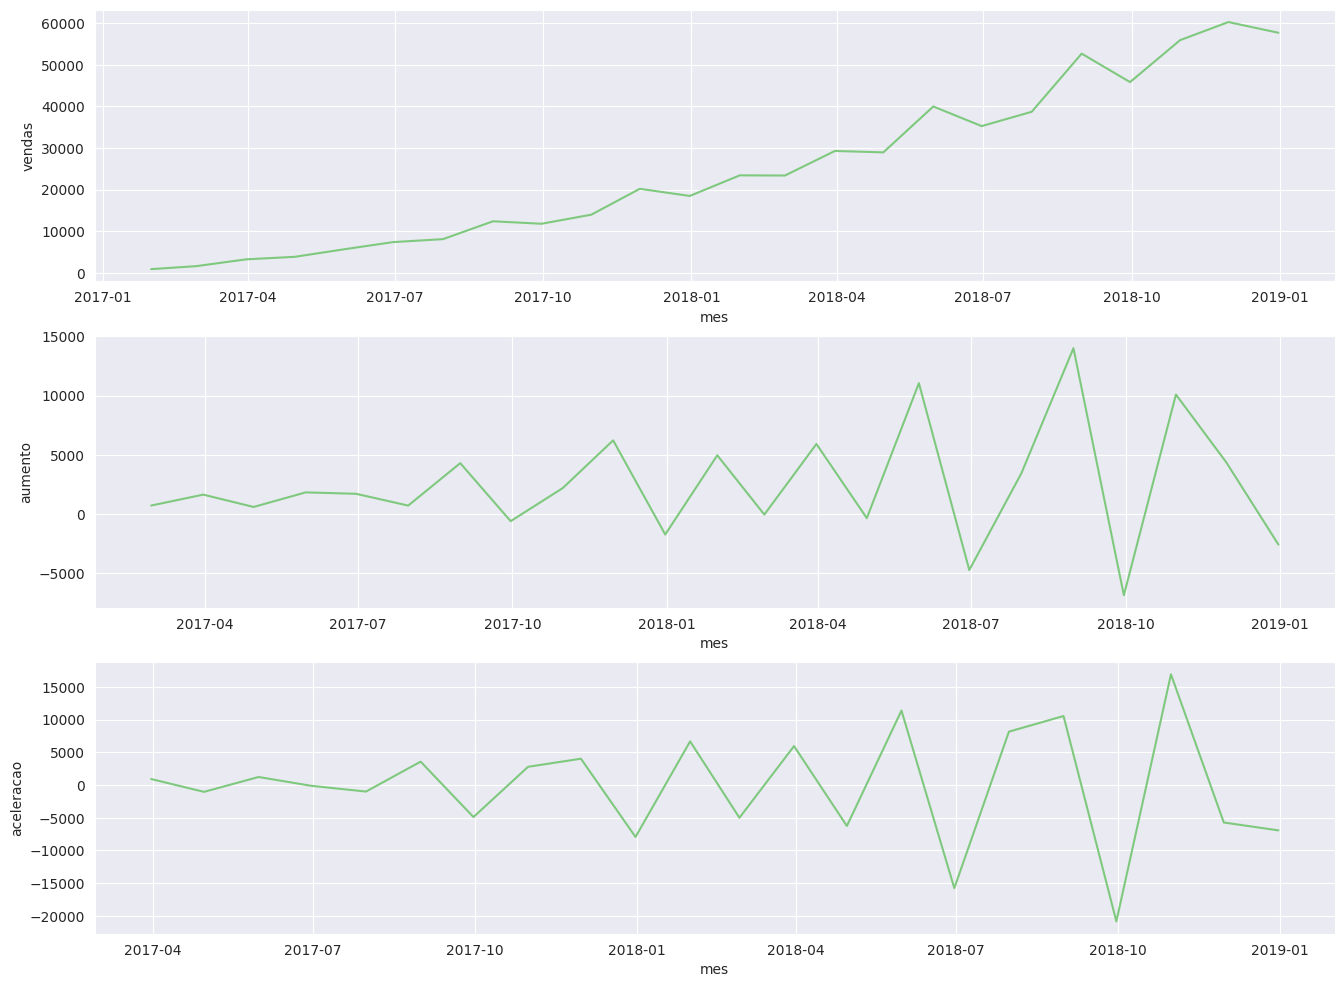

In [63]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', cafelura, '')

In [64]:
quant_fds = pd.read_csv('dias_final_de_semana.csv')
quant_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [65]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quant_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


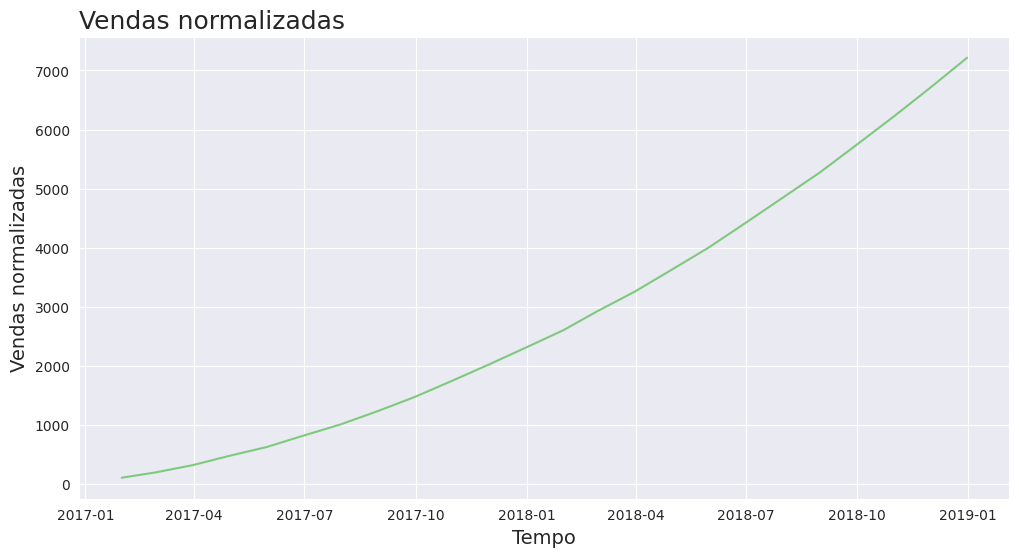

In [67]:
plotar('Vendas normalizadas', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

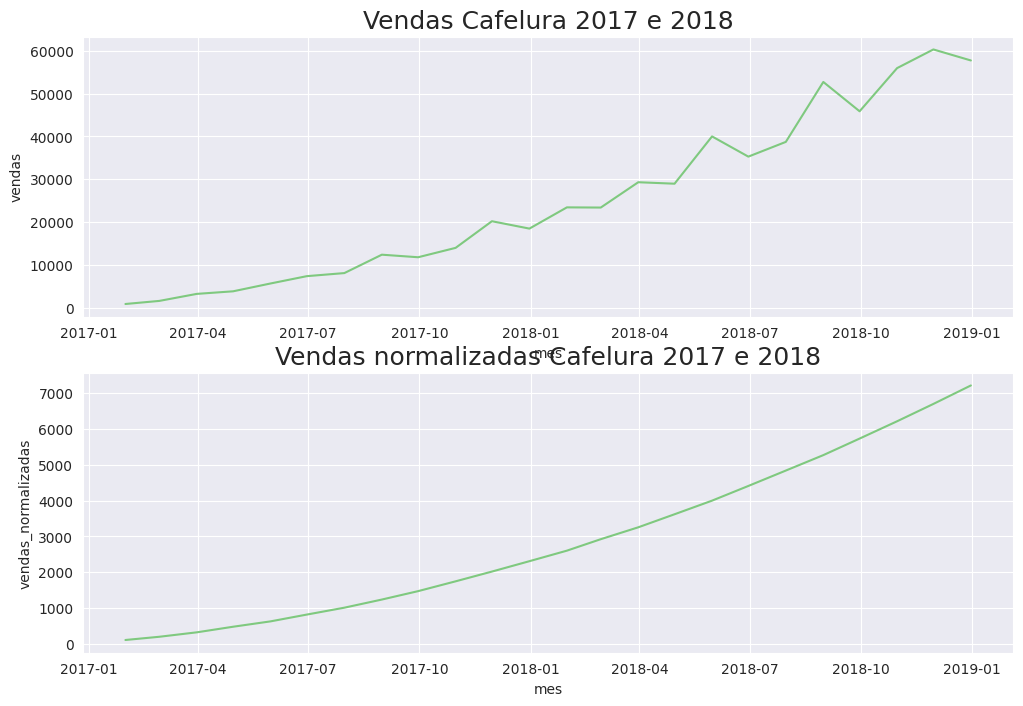

In [69]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
#resultado = seasonal_decompose([chocolura['vendas']], freq=1)
#ax = resultado.plot

In [77]:
#data = ({
#       'observacao':observacao,
#       'tendencia':tendencia,
#       'sazonalidade':sazonalidade,
#      'ruido':ruido
#})
#resultado = pd.DataFrame(data)
#resultado.head()

In [78]:
#plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

In [80]:
alucel = pd.read_csv('alucel.csv')
alucel.shape
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [81]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


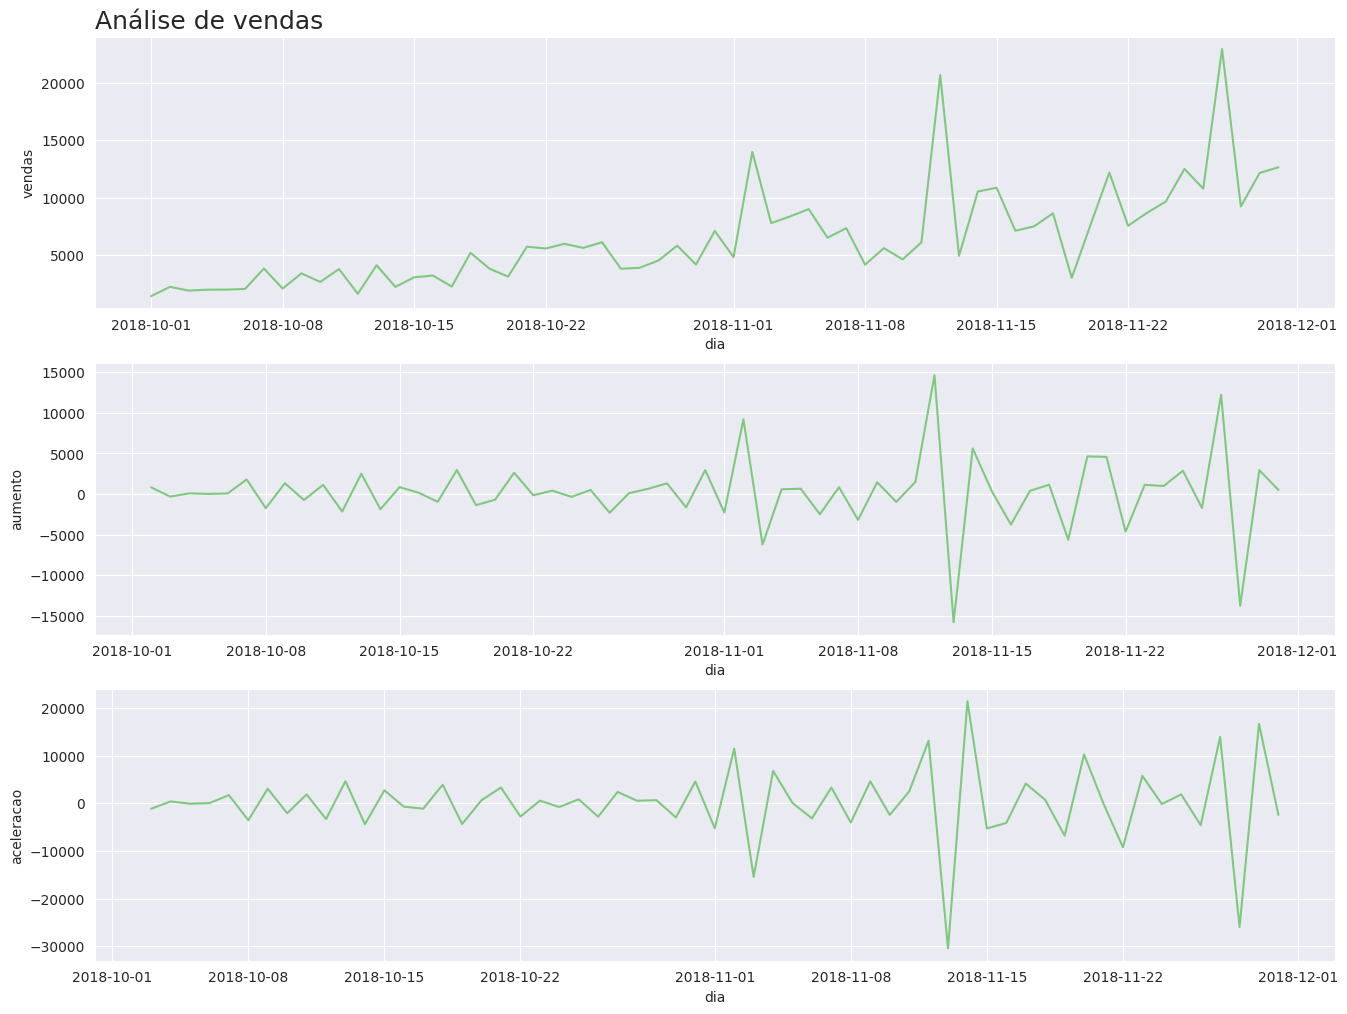

In [82]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas')

In [83]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head()

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


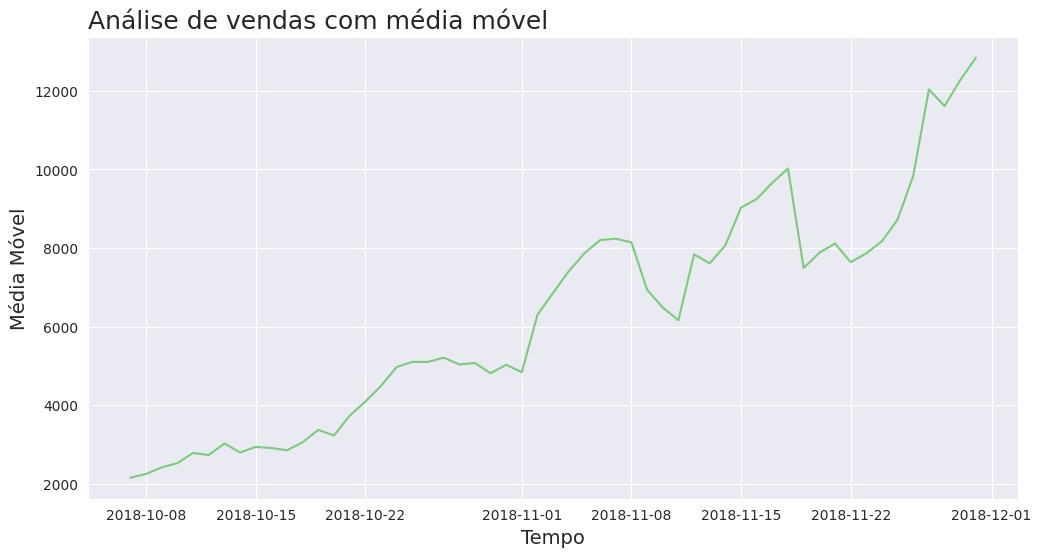

In [84]:
plotar('Análise de vendas com média móvel', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

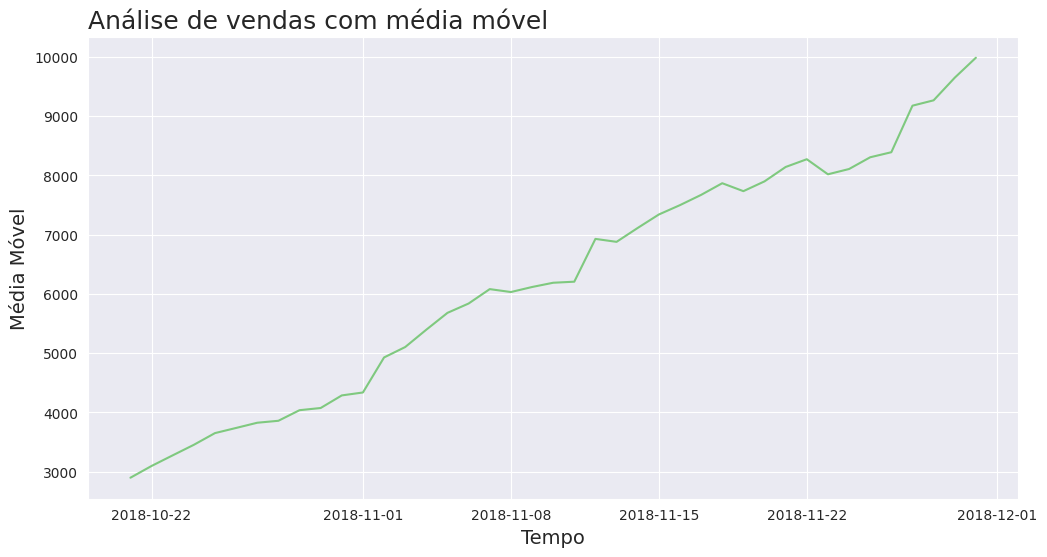

In [87]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise de vendas com média móvel', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

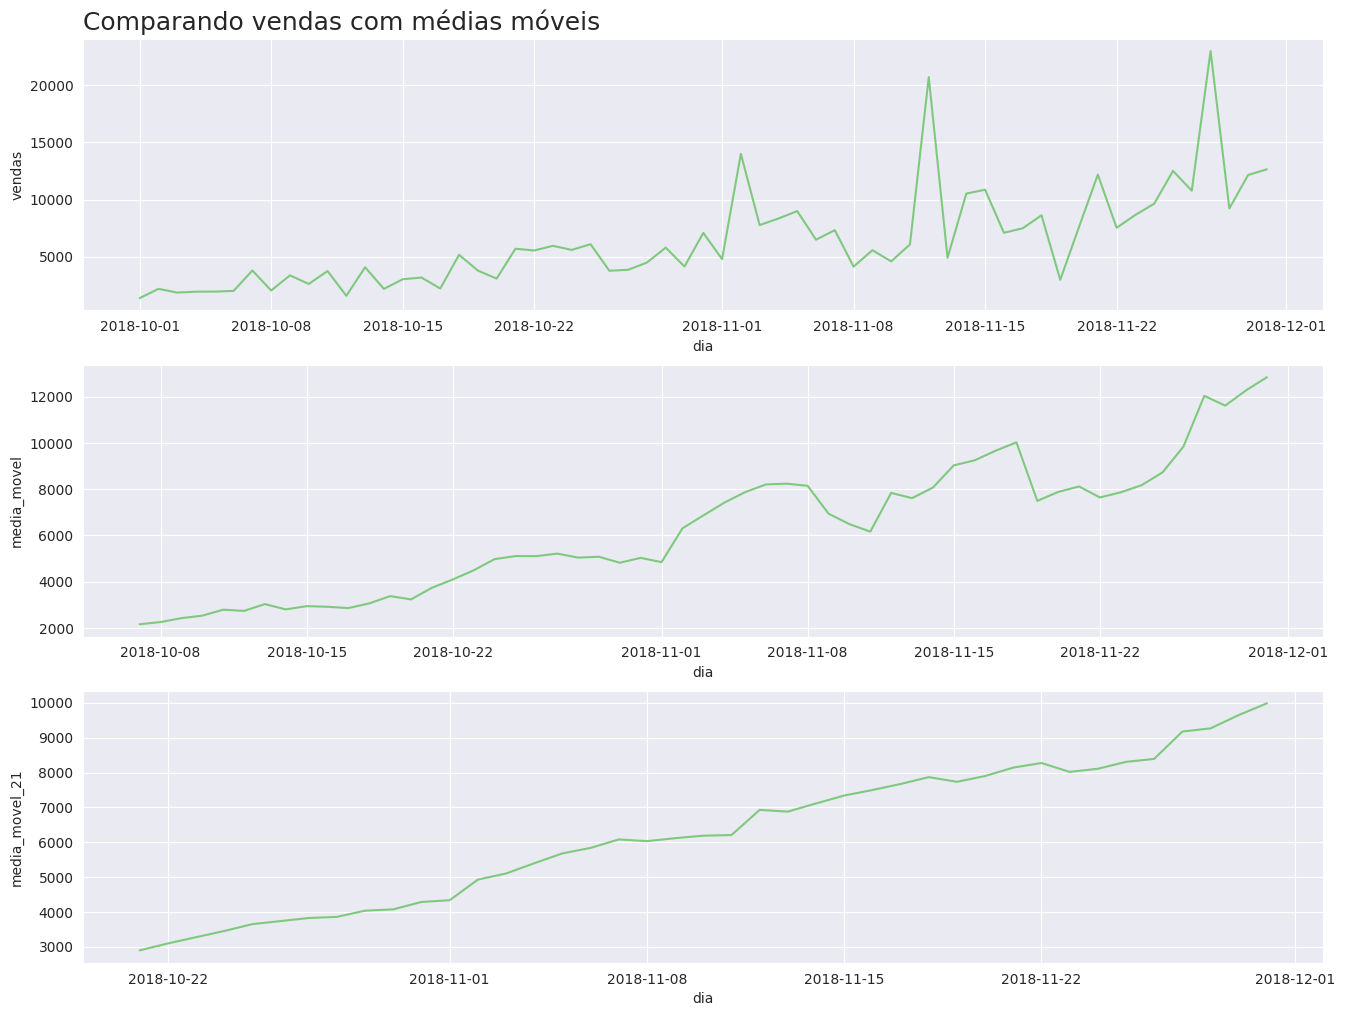

In [88]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando vendas com médias móveis')